# Train Model Parameterized 1D Model

### Import Modules

In [1]:
# extern modules
import pytorch_lightning as pl
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

# intern modules
from PNN_model_1d import ParameterizedNeuralNet
from dataset_1d import CustomDataset
from torch.utils.data import DataLoader

## 1) Generate Data

In [2]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

## 2) Train Model

In [3]:
# initalilizing the model
model = ParameterizedNeuralNet()

# initializing the trainer
trainer = pl.Trainer(max_epochs=5)

# train the model on the dataset
trainer.fit(model, dataloader)

/opt/homebrew/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/callback_connector.py:96: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=10)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  rank_zero_deprecation(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 1.4 K 
------------------------------------
1.4 K     Trainable params
0         Non-trainable params
1.4 K     Total params
0.005     Total estimated model params size (MB)
/opt/homebrew/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: 

Training: 0it [00:00, ?it/s]

## 3) Loss of the Model

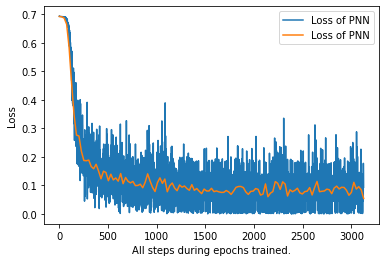

In [6]:
losses = np.asarray(model.losses)
losses_reshaped = losses.reshape(int(len(losses)/25), 25)
losses_reshaped =np.mean(losses_reshaped, axis=-1)

plt.plot(np.arange(0,losses.shape[0]), losses, label="Loss of PNN")
plt.plot(np.linspace(0,losses.shape[0], losses_reshaped.shape[0]), losses_reshaped, label="Loss of PNN")
plt.xlabel("All steps during epochs trained.")
plt.ylabel("Loss")
plt.legend()

## 4) Save Model

In [5]:
# path to save parameters from training
PATH = "../trained_models/PNN_1d.pth"
if not os.path.exists(os.path.dirname(PATH)):
    os.mkdir(os.path.dirname(PATH))

torch.save(model.state_dict(), PATH)
print(f"Saved the model dictionary under {PATH}. Exiting.")

Saved the model dictionary under ../trained_models/PNN_1d.pth. Exiting.
